# Eigen decomposition
- Only square matrix
- M개의 고유값(스칼라)과 M개의 대응되는 고유벡터가 존재한다
- 목적: 이러한 M 개의 스칼라 - 벡터 쌍을 찾는 것 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

## 12.1 Eigenvalue and eigenvector interpretation
- Eigenvector : The direction's remain unchanged by the trasnformation, only its magnitude changes
- Eigenvalue : 늘어나는 양이 고유값

### 12.1 기하학적 해석
- 고유 벡터는 행렬 벡터 곱셈이 스칼라 벡터 곱셈처럼 작동한다는 것을 의미함.
- 행렬이 스칼라와 같다는 것이 아니라, 벡터에 대해 행렬이 미치는 효과는 스칼라가 미치는 효과와 동일하다는 것

[-0.61803399  1.61803399]


/var/folders/1l/6dhcmnn51hj3w9sg068lv3_r0000gn/T/ipykernel_81108/2984996381.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


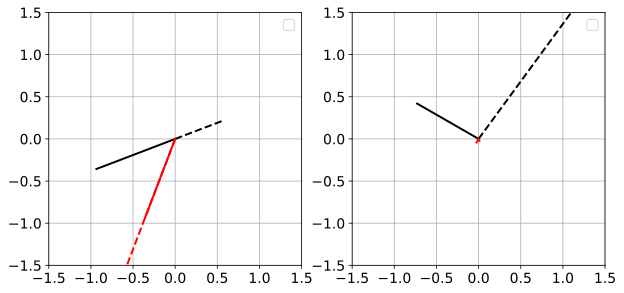

In [6]:
# in 2D of course, for visualization

# the matrix
M = np.array([ [-1,1],
               [-1,2] ])

# its eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(M)
print(eigenvalues)

# some random vectors
notEigenvectors = np.random.randn(2,2)

# multipy to create new vectors
Mv = M @ eigenvectors
Mw = M @ notEigenvectors

## and now plot
_,axs = plt.subplots(1,2,figsize=(10,6))

# the two eigenvectors
axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[1,0]],'k',linewidth=2,label='')
axs[0].plot([0,Mv[0,0]],[0,Mv[1,0]],'k--',linewidth=2,label='')

axs[0].plot([0,eigenvectors[0,1]],[0,eigenvectors[1,1]],'r',linewidth=2,label='')
axs[0].plot([0,Mv[0,1]],[0,Mv[1,1]],'r--',linewidth=2,label='')

# the two non-eigenvectors
axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[1,0]],'k',linewidth=2,label='')
axs[1].plot([0,Mw[0,0]],[0,Mw[1,0]],'k--',linewidth=2,label='')

axs[1].plot([0,notEigenvectors[0,1]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='')
axs[1].plot([0,Mw[0,1]],[0,Mw[1,1]],'r--',linewidth=2,label='')


# adjust the graphs a bit
for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.show()
     
# Left pictures are eigenvectors

### 12.1.2. Statistic(PCA)
- 다변량 데이터에서는 이변량 상관관계로 전체적 패턴을 파악하기 어렵다
- 세개의 큰 고유값으로 세가지 주요 하위 범주가 존재한다면, 세개의 큰 고유값이 존재한다

### 12.1.3. Noise attenuation

### 12.1.4 Dimentionality Reduction
- Data compress : 데이터 품질에 미치는 영향을 최소화하면서 데이터의 크기를 줄이는 것
- 데이터 집합을 데이터의 가장 중요한 특성을 나타내는 기준 벡터 집합으로 분해한 다음, 원본 데이터의 고품질 형태로 재구성하는 것

In [7]:
## 12.2 Finding eigenvalues
matrix = np.array( [ [1,2], [3,4] ] )

# get the eigenvalues
evals = np.linalg.eig(matrix)[0] # two eigenvalues
evals

array([-0.37228132,  5.37228132])

In [8]:
# Finding eigenvectors

evals,evecs = np.linalg.eig(matrix)
print(evals), print(' ')
print(evecs)

[-0.37228132  5.37228132]
 
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


## 12.3 Finding eigenvectors

In [9]:
# same matrix as above
evals,evecs = np.linalg.eig(matrix)

print('List of eigenvalues:')
print(evals)

print(f'\nMatrix of eigenvectors (in the columns!):')
print(evecs)

List of eigenvalues:
[-0.37228132  5.37228132]

Matrix of eigenvectors (in the columns!):
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


## 12.4. Diagonalizing a matrix

In [10]:
# using variables created above
D = np.diag(evals)
D

array([[-0.37228132,  0.        ],
       [ 0.        ,  5.37228132]])

In [11]:
# confirm the matrix eigenvalue equation:
LHS = matrix @ evecs
RHS = evecs @ D


# print out the two sides of the equation
print('Left-hand side:')
print(LHS)

print(f'\nRight-hand side:')
print(RHS)

Left-hand side:
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]

Right-hand side:
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]


## 12.5 Special properties of symmetric matrices

### 12.5.1. 직교 고유 벡터 

In [12]:
# just some random matrix
A = np.random.randint(-3,4,(3,3))

# and make it symmetric
A = A.T@A

# its eigendecomposition
L,V = np.linalg.eig(A)

# all pairwise dot products
print( np.dot(V[:,0],V[:,1]) )
print( np.dot(V[:,0],V[:,2]) )
print( np.dot(V[:,1],V[:,2]) )

-3.5977158893723736e-16
-3.0134570532999084e-17
-1.2668072023079882e-16


In [13]:
# show that V'V=I
np.round( V.T@V ,10) # rounded for visibility (precision errors...)

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

### 12.5.2. 실수 고윳값

In [14]:

# real-valued matrix with complex-valued eigenvalues

# a matrix
A = np.array([[-3, -3, 0],
              [ 3, -2, 3],
              [ 0,  1, 2]])


# btw, random matrices often have complex eigenvalues (though this is not guaranteed):
#A = np.random.randint(-3,4,(3,3))

# its eigendecomposition
L,V = np.linalg.eig(A)
L.reshape(-1,1) # print as column vector

array([[-2.744739  +2.85172624j],
       [-2.744739  -2.85172624j],
       [ 2.48947801+0.j        ]])

In [15]:
# repeat for symmetric matrices

# a matrix
A = np.array([[-3, -3, 0],
              [-3, -2, 1],
              [ 0,  1, 2]])


# you can also demonstrate this with random symmetric matrices
#A = np.random.randint(-3,4,(3,3))
#A = A.T@A

# its eigendecomposition
L,V = np.linalg.eig(A)
L.reshape(-1,1) # print as column vector

array([[-5.59707146],
       [ 0.22606174],
       [ 2.37100972]])

## 12.6. 특이 행렬의 고윳값 분해

In [16]:
# a singular matrix
A = np.array([[1,4,7],
              [2,5,8],
              [3,6,9]])

# its eigendecomposition
L,V = np.linalg.eig(A)


# print its rank...
print( f'Rank = {np.linalg.matrix_rank(A)}\n' )

# ... and its eigendecomposition
print('Eigenvalues: ')
print(L.round(2)), print(' ')

print('Eigenvectors:')
print(V.round(2))

Rank = 2

Eigenvalues: 
[16.12 -1.12 -0.  ]
 
Eigenvectors:
[[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


In [17]:
# FYI, random singular matrix
M = np.random.randn(5,3) @ np.random.randn(3,5)
M = M.T@M # make it symmetric for real-valued eigenvalues

# print its eigenvalues (rounded and columnized for clarity)
np.linalg.eig(M)[0].reshape(-1,1).round(3)

array([[13.36 +0.j],
       [ 4.087+0.j],
       [ 3.152+0.j],
       [ 0.   +0.j],
       [ 0.   -0.j]])

## 12.7 Quadratic form & definiteness

In [18]:
# a matrix with only positive quad.form values
A = np.array([ [2,4],[0,3] ])
print('Eigenvalues: ')
print(np.linalg.eig(A)[0])

# print the quadratic form for some random vectors
x,y = np.random.randn(2)
print(f'\nSome random quadratic form result:')
A[0,0]*x**2 + (A[1,0]+A[0,1])*x*y + A[1,1]*y**2
     

Eigenvalues: 
[2. 3.]

Some random quadratic form result:


8.650737938802974

In [19]:
# a matrix with both positive and negative quad.form values
A = np.array([ [-9,4],[3,9] ])
print('Eigenvalues: ')
print(np.linalg.eig(A)[0])

# print the quadratic form for some random vectors
x,y = np.random.randn(2)
print(f'\nSome random quadratic form result:')
A[0,0]*x**2 + (A[1,0]+A[0,1])*x*y + A[1,1]*y**2

Eigenvalues: 
[-9.64365076  9.64365076]

Some random quadratic form result:


2.7802027464761503

## 12.8 Generalized eigendecomposition

In [20]:
n = 4

# create symmetric matrices
A = np.random.randn(n,n)
A = A.T@A

# impose a correlation between the two matrices (this improves numerical stability of the simultaneousl diagonalization)
B = np.random.randn(n,n)
B = B.T@B + A/10


# using scipy
from scipy.linalg import eigh
evals,evecs = eigh(A,B)
evals

array([0.01164723, 0.09422862, 3.04525902, 9.42628126])